In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

In [58]:
data = pd.read_csv("../data/friance_new.csv")
data

/tmp/ipykernel_11077/2684119931.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/friance_new.csv")


,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,...,1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,1,0,0,0,1,0.0,0.0,0.0,0.25,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,...,1,0,0,0,1,0.0,"34.222.257.268.111.300,00","5.314.015.103.743.990,00",0.25,196.0
175024,2846,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,...,1,0,0,1,0,0.0,0.0,0.0,"6.896.551.724.137.930,00",58.0
175025,1999,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,...,1,0,0,0,1,0.0,0.0,0.0,"1.282.051.282.051.280,00",195.0
175026,1336,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,...,1,0,0,0,1,1.0,"29.107.950.548.954.000,00","5.641.075.687.781.790,00","2.857.142.857.142.850,00",350.0


In [59]:
data.drop(["Surname"], axis=1, inplace=True)

In [60]:
data['Surname_tfidf_0'] = data['Surname_tfidf_0'].astype(str).str.replace(".","")
data['Surname_tfidf_0'] = data['Surname_tfidf_0'].str.replace(",",".")

data['Surname_tfidf_1'] = data['Surname_tfidf_1'].astype(str).str.replace(".","")
data['Surname_tfidf_1'] = data['Surname_tfidf_1'].astype(str).str.replace(",",".")

data['Surname_tfidf_2'] = data['Surname_tfidf_2'].astype(str).str.replace(".","")
data['Surname_tfidf_2'] = data['Surname_tfidf_2'].astype(str).str.replace(",",".")

data['Surname_tfidf_3'] = data['Surname_tfidf_3'].astype(str).str.replace(".","")
data['Surname_tfidf_3'] = data['Surname_tfidf_3'].astype(str).str.replace(",",".")

data['Surname_tfidf_4'] = data['Surname_tfidf_4'].astype(str).str.replace(".","")
data['Surname_tfidf_4'] = data['Surname_tfidf_4'].astype(str).str.replace(",",".")

data['Cred_Bal_Sal'] = data['Cred_Bal_Sal'].astype(str).str.replace(".","")
data['Cred_Bal_Sal'] = data['Cred_Bal_Sal'].astype(str).str.replace(",",".")

data['Bal_sal'] = data['Bal_sal'].astype(str).str.replace(".","")
data['Bal_sal'] = data['Bal_sal'].astype(str).str.replace(",",".")

data['Tenure_Age'] = data['Tenure_Age'].astype(str).str.replace(".","")
data['Tenure_Age'] = data['Tenure_Age'].astype(str).str.replace(",",".")

data['EstimatedSalary'] = data['EstimatedSalary'].astype(str).str.replace(".","")
data['EstimatedSalary'] = data['EstimatedSalary'].astype(str).str.replace(",",".")

In [61]:
data['CreditScore'] = data['CreditScore'].astype('int64')
data['Age'] = data['Age'].astype('int64')
data['Tenure'] = data['Tenure'].astype('int64')
data['Balance'] = data['Balance'].astype('int64')
data['NumOfProducts'] = data['NumOfProducts'].astype('int64')
data['Mem__no__Products'] = data['Mem__no__Products'].astype('int64')
data['Age_Tenure_product'] = data['Age_Tenure_product'].astype('int64')

data['Surname_tfidf_2'] = data['Surname_tfidf_2'].astype(float)
data['Surname_tfidf_2'] = data['Surname_tfidf_2'].astype('int64')

data['Surname_tfidf_0'] = data['Surname_tfidf_0'].astype(float)
data['Surname_tfidf_0'] = data['Surname_tfidf_0'].astype('int64')

data['Surname_tfidf_1'] = data['Surname_tfidf_1'].astype(float)
data['Surname_tfidf_1'] = data['Surname_tfidf_1'].astype('int64')

data['Surname_tfidf_3'] = data['Surname_tfidf_3'].astype(float)
data['Surname_tfidf_3'] = data['Surname_tfidf_3'].astype('int64')

data['Surname_tfidf_4'] = data['Surname_tfidf_4'].astype(float)
data['Surname_tfidf_4'] = data['Surname_tfidf_4'].astype('int64')

data['Cred_Bal_Sal'] = data['Cred_Bal_Sal'].astype(float)
data['Cred_Bal_Sal'] = data['Cred_Bal_Sal'].astype('int64')

data['Bal_sal'] = data['Bal_sal'].astype(float)
data['Bal_sal'] = data['Bal_sal'].astype('int64')

data['Tenure_Age'] = data['Tenure_Age'].astype(float)
data['Tenure_Age'] = data['Tenure_Age'].astype('int64')

data['EstimatedSalary'] = data['EstimatedSalary'].astype(float)
data['EstimatedSalary'] = data['EstimatedSalary'].astype('int64')


In [62]:
data.dtypes

CreditScore           int64
Age                   int64
Tenure                int64
Balance               int64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary       int64
Exited                int64
Surname_tfidf_0       int64
Surname_tfidf_1       int64
Surname_tfidf_2       int64
Surname_tfidf_3       int64
Surname_tfidf_4       int64
France                int64
Germany               int64
Spain                 int64
Female                int64
Male                  int64
Mem__no__Products     int64
Cred_Bal_Sal          int64
Bal_sal               int64
Tenure_Age            int64
Age_Tenure_product    int64
dtype: object

In [63]:
y = data.Exited.values
x_data = data.drop(["Exited"], axis=1)
x_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_tfidf_0,Surname_tfidf_1,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,668,33,3,0,2,1,0,18144997,-3124436679,-460594640,...,1,0,0,0,1,0,0,0,9090909090909090,99
1,627,33,1,0,2,1,1,495035,481338256,838931547,...,1,0,0,0,1,2,0,0,30303030303030300,33
2,678,40,10,0,2,1,0,18486669,-3447294172650730,-2025033659055650,...,1,0,0,0,1,0,0,0,25,400
3,581,34,2,148882,1,1,1,8456088,-72209360028,-10461631817033800,...,1,0,0,0,1,1,10229405812711500,17606550452171200,58823529411764704,68
4,716,33,5,0,2,1,1,1506883,-1037134935,-545133813,...,0,0,1,0,1,2,0,0,15151515151515100,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,644,28,7,155060,1,1,0,2917952,-4763,114119,...,1,0,0,0,1,0,34222257268111300,5314015103743990,25,196
175024,800,29,2,0,2,0,0,16777355,-15103,68546,...,1,0,0,1,0,0,0,0,6896551724137930,58
175025,771,39,5,0,2,1,0,9627064,-15103,68546,...,1,0,0,0,1,0,0,0,1282051282051280,195
175026,516,35,10,57369,1,1,1,10169977,83065226551,9769052344005960,...,1,0,0,0,1,1,29107950548954000,5641075687781790,2857142857142850,350


In [64]:
# 2.metod
# data['Surname_tfidf_0'] = pd.to_numeric(data['Surname_tfidf_0'])

In [65]:
# data = data.applymap(int)

In [66]:
# Normalization

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [67]:
# train_test_split

from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)

In [69]:
y_train.shape

(140022,)

In [70]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [71]:
x_train.shape

(23, 140022)

In [72]:
y_train.shape

(140022,)

In [73]:
# parameter initialize and sigmoid function 

def initialize_weights_and_bias(dimension):

    w = np.full((dimension,1),0.01)
    b = 0.0

    return w,b

In [74]:
# sigmoid function

def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [75]:
sigmoid(5)

0.9933071490757153

In [76]:
# forward_backward_propagation

def forward_backward_propagation(w,b,x_train,y_train):

    z = np.dot(w.T,x_train) + b

    y_head = sigmoid(z)
    
    # kayıplar
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)

    # kayıplar toplamının ortalaması
    cost = (np.sum(loss))/x_train.shape[1]

    # türevlerin sebebi kayıpları azaltarak hatayı indirgemek
    # kayıp çok olduğundan w türevi
    derivate_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]

    # kayıp çok olduğundan b türevi
    derivate_bias = np.sum(y_head-y_train)/x_train.shape[1]

    gradients = {"derivate_weight":derivate_weight,"derivate_bias": derivate_bias}

    return cost,gradients

In [77]:
# learning

def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):

        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)

        w = w - learning_rate * gradients["derivate_weight"]
        b = b - learning_rate * gradients["derivate_bias"]

        if i % 10 == 0:

            cost_list2.append(cost)
            index.append(i)
            
            print("Cost after iterarion %i: %f" %(i,cost))

    parameters = {"weight": w, "bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients, cost_list

In [78]:
x_test.shape

(23, 35006)

In [79]:
# prediction 

def predict(w,b,x_test):

    z = sigmoid(np.dot(w.T,x_test)+b)

    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

In [80]:
x_train.shape

(23, 140022)

Cost after iterarion 0: 0.726322
Cost after iterarion 10: 0.515803
Cost after iterarion 20: 0.515733
Cost after iterarion 30: 0.515665
Cost after iterarion 40: 0.515597
Cost after iterarion 50: 0.515531
Cost after iterarion 60: 0.515465
Cost after iterarion 70: 0.515401
Cost after iterarion 80: 0.515337
Cost after iterarion 90: 0.515274
Cost after iterarion 100: 0.515212
Cost after iterarion 110: 0.515151
Cost after iterarion 120: 0.515091
Cost after iterarion 130: 0.515032
Cost after iterarion 140: 0.514974
Cost after iterarion 150: 0.514916
Cost after iterarion 160: 0.514859
Cost after iterarion 170: 0.514804
Cost after iterarion 180: 0.514749
Cost after iterarion 190: 0.514694
Cost after iterarion 200: 0.514641
Cost after iterarion 210: 0.514588
Cost after iterarion 220: 0.514536
Cost after iterarion 230: 0.514485
Cost after iterarion 240: 0.514435


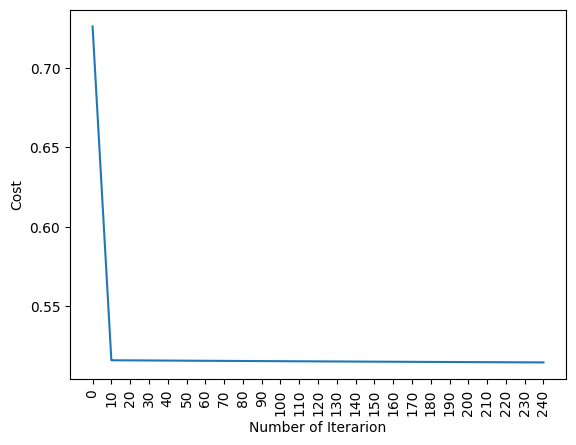

test accuracy: 78.86076672570417 %


In [83]:
# logistic regression

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):

    dimension = x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w,b, x_train, y_train, learning_rate, num_iterations)

    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)

    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) *100))

logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 1, num_iterations = 250)

In [85]:
# Sklearn with logistic regression
from sklearn.linear_model import LogisticRegression

In [86]:
lr = LogisticRegression()

In [87]:
lr.fit(x_train.T,y_train.T)

print('test accuracy {}'.format(lr.score(x_test.T,y_test.T)))

test accuracy 0.7885219676626865
